In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score, 
    confusion_matrix,
    classification_report,
    roc_curve
)

%matplotlib inline


In [3]:
# load the dataset 

data = load_breast_cancer()

# Features and target
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)  # 0 = malignant, 1 = benign


Dataset shape: (569, 30)
Target distribution:
 1    357
0    212
Name: count, dtype: int64


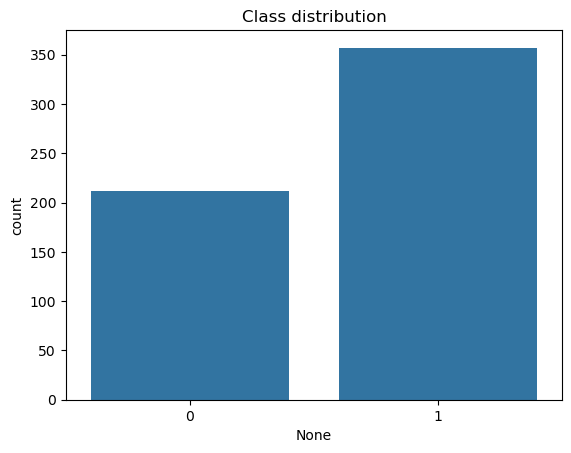

In [4]:
# checking the data 

print("Dataset shape:", X.shape)
print("Target distribution:\n", y.value_counts())

# Plot distribution
sns.countplot(x=y)
plt.title("Class distribution")
plt.show()


* Train / Test split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


* Feature Scaling

In [6]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


* Training Logistic Regression 

In [7]:
model = LogisticRegression(
    penalty='l2',
    C=1.0,
    solver='liblinear',
    random_state=42
)

model.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42, solver='liblinear')